In [3]:
import pandas as pd

# อ่านไฟล์ CSV
df = pd.read_csv('Housing.csv')

# ลบคอลัมน์ที่ไม่ต้องการ
df = df.drop(columns=['hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus'])

# แสดงผลลัพธ์
print(df)

        price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0    13300000  7420         4          2        3      yes        no       no   
1    12250000  8960         4          4        4      yes        no       no   
2    12250000  9960         3          2        2      yes        no      yes   
3    12215000  7500         4          2        2      yes        no      yes   
4    11410000  7420         4          1        2      yes       yes      yes   
..        ...   ...       ...        ...      ...      ...       ...      ...   
540   1820000  3000         2          1        1      yes        no      yes   
541   1767150  2400         3          1        1       no        no       no   
542   1750000  3620         2          1        1      yes        no       no   
543   1750000  2910         3          1        1       no        no       no   
544   1750000  3850         3          1        2      yes        no       no   

     parking  
0          2

In [4]:
import pandas as pd

# อ่านไฟล์ CSV
df = pd.read_csv('Housing.csv')

# เปลี่ยนค่า 'yes' เป็น 1 และ 'no' เป็น 0
df['mainroad'] = df['mainroad'].map({'yes': 1, 'no': 0})
df['guestroom'] = df['guestroom'].map({'yes': 1, 'no': 0})
df['basement'] = df['basement'].map({'yes': 1, 'no': 0})
df['parking'] = df['parking'].map({'yes': 1, 'no': 0})

# แสดงผลลัพธ์
print(df)

        price  area  bedrooms  bathrooms  stories  mainroad  guestroom  \
0    13300000  7420         4          2        3         1          0   
1    12250000  8960         4          4        4         1          0   
2    12250000  9960         3          2        2         1          0   
3    12215000  7500         4          2        2         1          0   
4    11410000  7420         4          1        2         1          1   
..        ...   ...       ...        ...      ...       ...        ...   
540   1820000  3000         2          1        1         1          0   
541   1767150  2400         3          1        1         0          0   
542   1750000  3620         2          1        1         1          0   
543   1750000  2910         3          1        1         0          0   
544   1750000  3850         3          1        2         1          0   

     basement hotwaterheating airconditioning  parking prefarea  \
0           0              no             ye

In [5]:
import pandas as pd

# อ่านไฟล์ CSV
df = pd.read_csv('Housing.csv')

# 1. การจัดการกับค่าที่ขาดหายไป (Missing Values)
# แสดงจำนวนค่าที่ขาดหายไปในแต่ละคอลัมน์
print("Missing values before handling:")
print(df.isnull().sum())

# เติมค่าที่ขาดหายไปด้วยค่าเฉลี่ย (สำหรับคอลัมน์ตัวเลข) หรือค่าที่พบบ่อยที่สุด (สำหรับคอลัมน์หมวดหมู่)
df['price'].fillna(df['price'].mean(), inplace=True)  # เติมค่าขาดในคอลัมน์ price ด้วยค่าเฉลี่ย
df['bedrooms'].fillna(df['bedrooms'].mode()[0], inplace=True)  # เติมค่าขาดในคอลัมน์ bedrooms ด้วยค่าที่พบบ่อยที่สุด
df['bathrooms'].fillna(df['bathrooms'].mode()[0], inplace=True)  # เติมค่าขาดในคอลัมน์ bathrooms ด้วยค่าที่พบบ่อยที่สุด

# 2. การทำให้ค่าที่ไม่สอดคล้องกันมีความสอดคล้องกัน (Consistency)
# เปลี่ยนค่า 'yes' และ 'no' ให้เป็น 1 และ 0
df['mainroad'] = df['mainroad'].map({'yes': 1, 'no': 0})
df['guestroom'] = df['guestroom'].map({'yes': 1, 'no': 0})
df['basement'] = df['basement'].map({'yes': 1, 'no': 0})
df['hotwaterheating'] = df['hotwaterheating'].map({'yes': 1, 'no': 0})
df['airconditioning'] = df['airconditioning'].map({'yes': 1, 'no': 0})
df['prefarea'] = df['prefarea'].map({'yes': 1, 'no': 0})

# 3. การแปลงค่าหมวดหมู่ (Categorical Values) เป็นค่าตัวเลข (Numeric Values)
# ใช้ pd.get_dummies() เพื่อแปลงคอลัมน์ furnishingstatus เป็นค่าตัวเลข
df = pd.get_dummies(df, columns=['furnishingstatus'], drop_first=True)

# แสดงผลลัพธ์หลังการเตรียมข้อมูล
print("Data after preparation:")
print(df.head())

Missing values before handling:
price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64
Data after preparation:
      price  area  bedrooms  bathrooms  stories  mainroad  guestroom  \
0  13300000  7420         4          2        3         1          0   
1  12250000  8960         4          4        4         1          0   
2  12250000  9960         3          2        2         1          0   
3  12215000  7500         4          2        2         1          0   
4  11410000  7420         4          1        2         1          1   

   basement  hotwaterheating  airconditioning  parking  prefarea  \
0         0                0                1        2         1   
1         0                0                1        3         0   
2       

<ipython-input-5-52c4387d814e>:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['price'].fillna(df['price'].mean(), inplace=True)  # เติมค่าขาดในคอลัมน์ price ด้วยค่าเฉลี่ย
<ipython-input-5-52c4387d814e>:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 

In [6]:
import pandas as pd

# อ่านไฟล์ CSV
df = pd.read_csv('Housing.csv')

# 1. การจัดการกับค่าที่ขาดหายไป (Missing Values)
# แสดงจำนวนค่าที่ขาดหายไปในแต่ละคอลัมน์
print("Missing values before handling:")
print(df.isnull().sum())

# เติมค่าที่ขาดหายไปด้วยค่าเฉลี่ย (สำหรับคอลัมน์ตัวเลข) หรือค่าที่พบบ่อยที่สุด (สำหรับคอลัมน์หมวดหมู่)
df['price'] = df['price'].fillna(df['price'].mean())  # เติมค่าขาดในคอลัมน์ price ด้วยค่าเฉลี่ย
df['bedrooms'] = df['bedrooms'].fillna(df['bedrooms'].mode()[0])  # เติมค่าขาดในคอลัมน์ bedrooms ด้วยค่าที่พบบ่อยที่สุด
df['bathrooms'] = df['bathrooms'].fillna(df['bathrooms'].mode()[0])  # เติมค่าขาดในคอลัมน์ bathrooms ด้วยค่าที่พบบ่อยที่สุด

# 2. การทำให้ค่าที่ไม่สอดคล้องกันมีความสอดคล้องกัน (Consistency)
# เปลี่ยนค่า 'yes' และ 'no' ให้เป็น 1 และ 0
df['mainroad'] = df['mainroad'].map({'yes': 1, 'no': 0})
df['guestroom'] = df['guestroom'].map({'yes': 1, 'no': 0})
df['basement'] = df['basement'].map({'yes': 1, 'no': 0})
df['hotwaterheating'] = df['hotwaterheating'].map({'yes': 1, 'no': 0})
df['airconditioning'] = df['airconditioning'].map({'yes': 1, 'no': 0})
df['prefarea'] = df['prefarea'].map({'yes': 1, 'no': 0})

# 3. การแปลงค่าหมวดหมู่ (Categorical Values) เป็นค่าตัวเลข (Numeric Values)
# ใช้ pd.get_dummies() เพื่อแปลงคอลัมน์ furnishingstatus เป็นค่าตัวเลข
df = pd.get_dummies(df, columns=['furnishingstatus'], drop_first=True)

# แสดงผลลัพธ์หลังการเตรียมข้อมูล
print("Data after preparation:")
print(df.head())

Missing values before handling:
price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64
Data after preparation:
      price  area  bedrooms  bathrooms  stories  mainroad  guestroom  \
0  13300000  7420         4          2        3         1          0   
1  12250000  8960         4          4        4         1          0   
2  12250000  9960         3          2        2         1          0   
3  12215000  7500         4          2        2         1          0   
4  11410000  7420         4          1        2         1          1   

   basement  hotwaterheating  airconditioning  parking  prefarea  \
0         0                0                1        2         1   
1         0                0                1        3         0   
2       

In [7]:
print("Data after preparation:")
print(df.head())
print(df.isnull().sum())  # ตรวจสอบค่าที่ขาดหายไปอีกครั้ง

Data after preparation:
      price  area  bedrooms  bathrooms  stories  mainroad  guestroom  \
0  13300000  7420         4          2        3         1          0   
1  12250000  8960         4          4        4         1          0   
2  12250000  9960         3          2        2         1          0   
3  12215000  7500         4          2        2         1          0   
4  11410000  7420         4          1        2         1          1   

   basement  hotwaterheating  airconditioning  parking  prefarea  \
0         0                0                1        2         1   
1         0                0                1        3         0   
2         1                0                0        2         1   
3         1                0                1        3         1   
4         1                0                1        2         0   

   furnishingstatus_semi-furnished  furnishingstatus_unfurnished  
0                            False                         False  


In [8]:
from sklearn.model_selection import train_test_split

# แบ่งข้อมูลเป็นชุดฝึกและชุดทดสอบ
X = df.drop('price', axis=1)  # ฟีเจอร์
y = df['price']  # เป้าหมาย

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
from sklearn.linear_model import LinearRegression

# สร้างโมเดล
model = LinearRegression()
model.fit(X_train, y_train)

# ทำนายผล
predictions = model.predict(X_test)

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [11]:
# สร้างโมเดล Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# ทำนายผล
linear_predictions = linear_model.predict(X_test)

# ประเมินผล
linear_mse = mean_squared_error(y_test, linear_predictions)
linear_r2 = r2_score(y_test, linear_predictions)

print("Linear Regression MSE:", linear_mse)
print("Linear Regression R^2:", linear_r2)

# สร้างโมเดล Decision Tree Regressor
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)

# ทำนายผล
tree_predictions = tree_model.predict(X_test)

# ประเมินผล
tree_mse = mean_squared_error(y_test, tree_predictions)
tree_r2 = r2_score(y_test, tree_predictions)

print("Decision Tree MSE:", tree_mse)
print("Decision Tree R^2:", tree_r2)

# สร้างโมเดล Random Forest Regressor
forest_model = RandomForestRegressor(random_state=42)
forest_model.fit(X_train, y_train)

# ทำนายผล
forest_predictions = forest_model.predict(X_test)

# ประเมินผล
forest_mse = mean_squared_error(y_test, forest_predictions)
forest_r2 = r2_score(y_test, forest_predictions)

print("Random Forest MSE:", forest_mse)
print("Random Forest R^2:", forest_r2)



Linear Regression MSE: 1754318687330.6633
Linear Regression R^2: 0.6529242642153185
Decision Tree MSE: 2642802637614.6787
Decision Tree R^2: 0.4771459275854347
Random Forest MSE: 1964193399645.3335
Random Forest R^2: 0.6114024924156645


Best parameters for Random Forest: {'max_depth': None, 'min_samples_split': 10, 'n_estimators': 50}
Linear Regression CV MSE: 2120447069698.9968
Random Forest CV MSE: 2817872671113.792


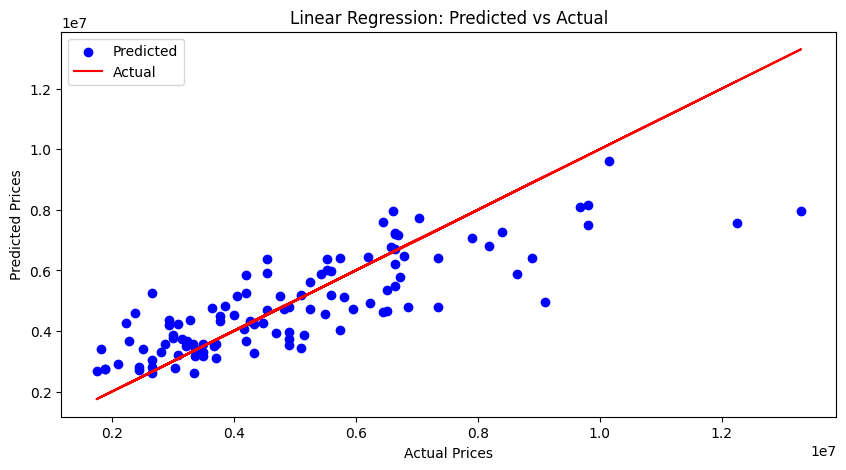

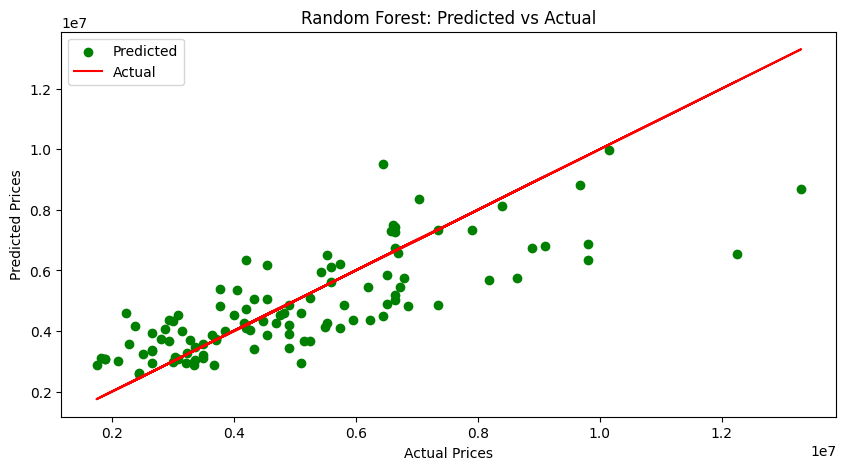

NameError: name 'np' is not defined

In [16]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# กำหนดพารามิเตอร์ที่ต้องการทดสอบ
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# สร้างโมเดล Random Forest
rf = RandomForestRegressor(random_state=42)

# ใช้ GridSearchCV เพื่อค้นหาค่าพารามิเตอร์ที่ดีที่สุด
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# แสดงค่าพารามิเตอร์ที่ดีที่สุด
print("Best parameters for Random Forest:", grid_search.best_params_)

from sklearn.model_selection import cross_val_score

# ใช้ Cross-Validation กับโมเดล Linear Regression
linear_cv_scores = cross_val_score(LinearRegression(), X, y, cv=5, scoring='neg_mean_squared_error')
print("Linear Regression CV MSE:", -linear_cv_scores.mean())

# ใช้ Cross-Validation กับโมเดล Random Forest
rf_cv_scores = cross_val_score(RandomForestRegressor(random_state=42), X, y, cv=5, scoring='neg_mean_squared_error')
print("Random Forest CV MSE:", -rf_cv_scores.mean())

import matplotlib.pyplot as plt

# สร้างกราฟสำหรับ Linear Regression
plt.figure(figsize=(10, 5))
plt.scatter(y_test, linear_predictions, color='blue', label='Predicted')
plt.plot(y_test, y_test, color='red', label='Actual')
plt.title('Linear Regression: Predicted vs Actual')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.legend()
plt.show()

# สร้างกราฟสำหรับ Random Forest
plt.figure(figsize=(10, 5))
plt.scatter(y_test, forest_predictions, color='green', label='Predicted')
plt.plot(y_test, y_test, color='red', label='Actual')
plt.title('Random Forest: Predicted vs Actual')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.legend()
plt.show()

from sklearn.ensemble import RandomForestRegressor

# สร้างโมเดล Random Forest เพื่อดูความสำคัญของฟีเจอร์
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# แสดงความสำคัญของฟีเจอร์
importances = rf_model.feature_importances_
feature_names = X.columns
indices = np.argsort(importances)[::-1]

# แสดงความสำคัญของฟีเจอร์
print("Feature ranking:")
for f in range(X.shape[1]):
    print(f"{f + 1}. {feature_names[indices[f]]} ({importances[indices[f]]})")

# สร้างกราฟแสดงความสำคัญของฟีเจอร์
plt.figure(figsize=(10, 5))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), feature_names[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# อ่านไฟล์ CSV
df = pd.read_csv('Housing.csv')

# การเตรียมข้อมูล
# เปลี่ยนค่า 'yes' และ 'no' ให้เป็น 1 และ 0
df['mainroad'] = df['mainroad'].map({'yes': 1, 'no': 0})
df['guestroom'] = df['guestroom'].map({'yes': 1, 'no': 0})
df['basement'] = df['basement'].map({'yes': 1, 'no': 0})
df['hotwaterheating'] = df['hotwaterheating'].map({'yes': 1, 'no': 0})
df['airconditioning'] = df['airconditioning'].map({'yes': 1, 'no': 0})
df['prefarea'] = df['prefarea'].map({'yes': 1, 'no': 0})

# ใช้ pd.get_dummies() เพื่อแปลงคอลัมน์ furnishingstatus เป็นค่าตัวเลข
df = pd.get_dummies(df, columns=['furnishingstatus'], drop_first=True)

# แบ่งข้อมูลเป็นฟีเจอร์และเป้าหมาย
X = df[['area', 'bathrooms', 'airconditioning', 'parking', 'stories', 'bedrooms']]  # ฟีเจอร์ที่สำคัญ
y = df['price']  # เป้าหมาย

# แบ่งข้อมูลเป็นชุดฝึกและชุดทดสอบ
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# สร้างโมเดล Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# ทำนายผล
linear_predictions = linear_model.predict(X_test)

# ประเมินผล
linear_mse = mean_squared_error(y_test, linear_predictions)
linear_r2 = r2_score(y_test, linear_predictions)

print("Linear Regression MSE:", linear_mse)
print("Linear Regression R^2:", linear_r2)

# สร้างโมเดล Random Forest Regressor
rf_model = RandomForestRegressor(max_depth=None, min_samples_split=10, n_estimators=50, random_state=42)
rf_model.fit(X_train, y_train)

# ทำนายผล
rf_predictions = rf_model.predict(X_test)

# ประเมินผล
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_r2 = r2_score(y_test, rf_predictions)

print("Random Forest MSE:", rf_mse)
print("Random Forest R^2:", rf_r2)

Linear Regression MSE: 2079310933780.2537
Linear Regression R^2: 0.5886275524061102
Random Forest MSE: 2290681357676.0073
Random Forest R^2: 0.5468098678961402


Linear Regression MSE: 2079310933780.2537
Linear Regression R^2: 0.5886275524061102
Random Forest MSE: 2290681357676.0073
Random Forest R^2: 0.5468098678961402
Linear Regression CV MSE: 2379712420093.4346
Random Forest CV MSE: 3039610358769.3765


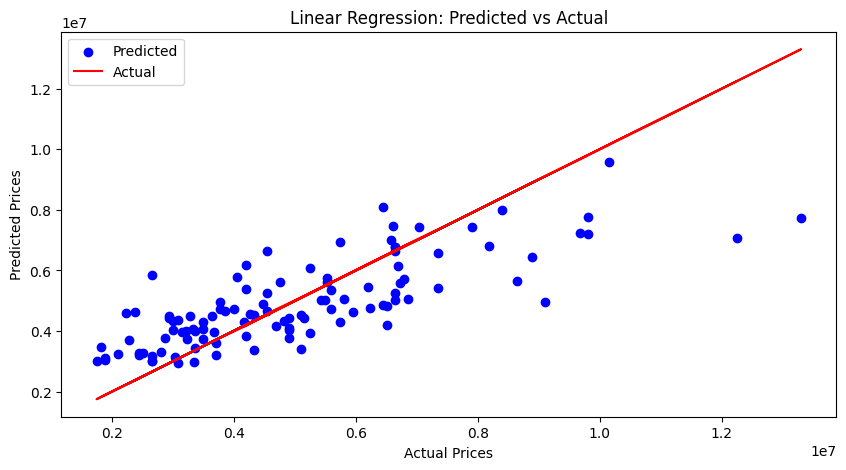

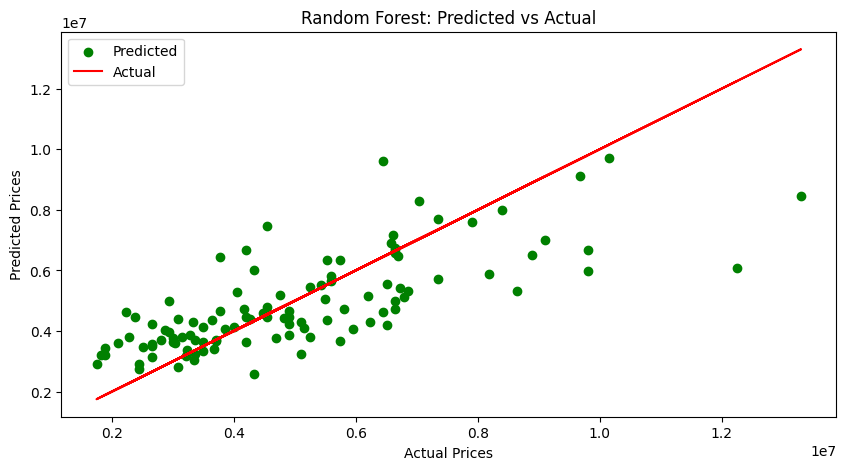

Feature ranking:
1. area (0.5453893579678297)
2. bathrooms (0.18133578273278164)
3. airconditioning (0.07528439428280843)
4. parking (0.0712004276275065)
5. stories (0.06465694027119209)
6. bedrooms (0.062133097117881744)


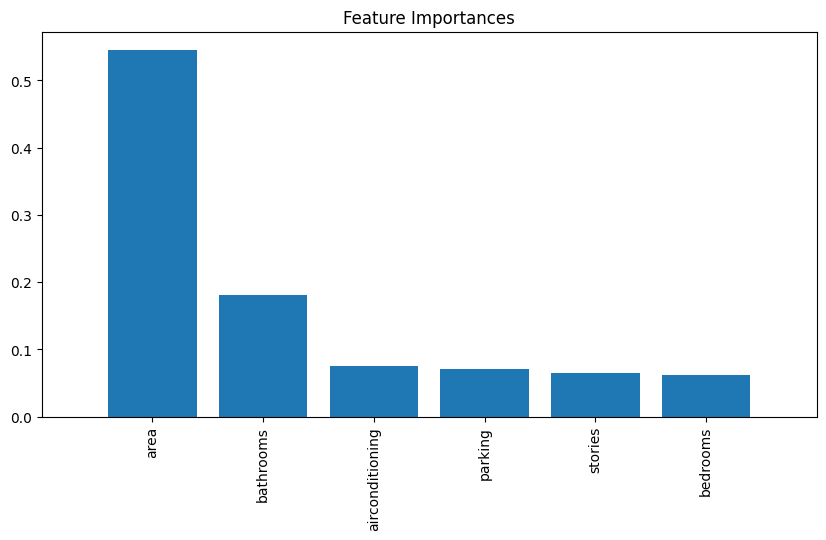

In [19]:
# ทำนายผล
linear_predictions = linear_model.predict(X_test)

# ประเมินผล
linear_mse = mean_squared_error(y_test, linear_predictions)
linear_r2 = r2_score(y_test, linear_predictions)

print("Linear Regression MSE:", linear_mse)
print("Linear Regression R^2:", linear_r2)
# สร้างโมเดล Random Forest Regressor
rf_model = RandomForestRegressor(max_depth=None, min_samples_split=10, n_estimators=50, random_state=42)
rf_model.fit(X_train, y_train)

# ทำนายผล
rf_predictions = rf_model.predict(X_test)

# ประเมินผล
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_r2 = r2_score(y_test, rf_predictions)

print("Random Forest MSE:", rf_mse)
print("Random Forest R^2:", rf_r2)
# ใช้ Cross-Validation กับโมเดล Linear Regression
linear_cv_scores = cross_val_score(LinearRegression(), X, y, cv=5, scoring='neg_mean_squared_error')
print("Linear Regression CV MSE:", -linear_cv_scores.mean())

# ใช้ Cross-Validation กับโมเดล Random Forest
rf_cv_scores = cross_val_score(RandomForestRegressor(max_depth=None, min_samples_split=10, n_estimators=50, random_state=42), X, y, cv=5, scoring='neg_mean_squared_error')
print("Random Forest CV MSE:", -rf_cv_scores.mean())
# สร้างกราฟสำหรับ Linear Regression
plt.figure(figsize=(10, 5))
plt.scatter(y_test, linear_predictions, color='blue', label='Predicted')
plt.plot(y_test, y_test, color='red', label='Actual')
plt.title('Linear Regression: Predicted vs Actual')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.legend()
plt.show()

# สร้างกราฟสำหรับ Random Forest
plt.figure(figsize=(10, 5))
plt.scatter(y_test, rf_predictions, color='green', label='Predicted')
plt.plot(y_test, y_test, color='red', label='Actual')
plt.title('Random Forest: Predicted vs Actual')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.legend()
plt.show()
# สร้างโมเดล Random Forest เพื่อดูความสำคัญของฟีเจอร์
rf_model.fit(X_train, y_train)

# แสดงความสำคัญของฟีเจอร์
importances = rf_model.feature_importances_
feature_names = X.columns
indices = np.argsort(importances)[::-1]

# แสดงความสำคัญของฟีเจอร์
print("Feature ranking:")
for f in range(X.shape[1]):
    print(f"{f + 1}. {feature_names[indices[f]]} ({importances[indices[f]]})")

# สร้างกราฟแสดงความสำคัญของฟีเจอร์
plt.figure(figsize=(10, 5))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), feature_names[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

New Linear Regression MSE: 2079310933780.2537
New Linear Regression R^2: 0.5886275524061102
New Random Forest MSE: 2290681357676.0073
New Random Forest R^2: 0.5468098678961402
New Linear Regression CV MSE: 2379712420093.4346
New Random Forest CV MSE: 3039610358769.3765


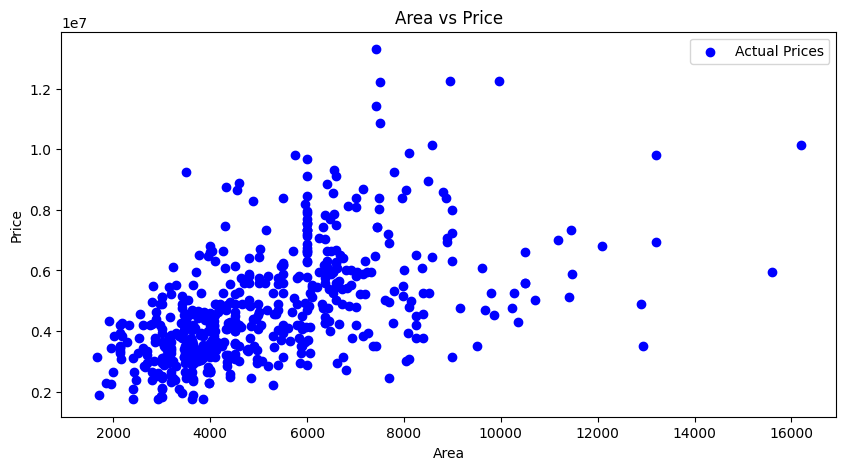

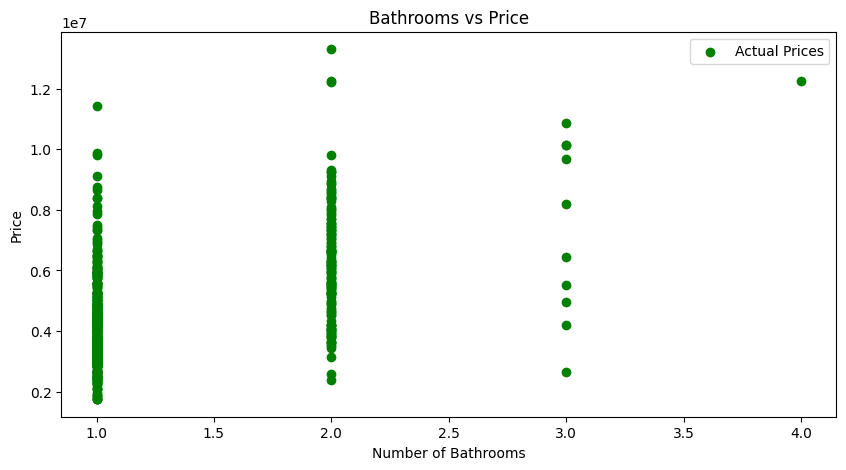

Best parameters for Random Forest after tuning: {'max_depth': None, 'min_samples_split': 10, 'n_estimators': 50}


In [20]:
# ฟีเจอร์ที่สำคัญที่สุด
important_features = ['area', 'bathrooms', 'airconditioning', 'parking', 'stories', 'bedrooms']

# แบ่งข้อมูลเป็นฟีเจอร์และเป้าหมาย
X_new = df[important_features]  # ฟีเจอร์ที่สำคัญ
y_new = df['price']  # เป้าหมาย

# แบ่งข้อมูลเป็นชุดฝึกและชุดทดสอบ
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new, y_new, test_size=0.2, random_state=42)
# สร้างโมเดล Linear Regression ใหม่
linear_model_new = LinearRegression()
linear_model_new.fit(X_train_new, y_train_new)

# ทำนายผล
linear_predictions_new = linear_model_new.predict(X_test_new)

# ประเมินผล
linear_mse_new = mean_squared_error(y_test_new, linear_predictions_new)
linear_r2_new = r2_score(y_test_new, linear_predictions_new)

print("New Linear Regression MSE:", linear_mse_new)
print("New Linear Regression R^2:", linear_r2_new)
# สร้างโมเดล Random Forest Regressor ใหม่
rf_model_new = RandomForestRegressor(max_depth=None, min_samples_split=10, n_estimators=50, random_state=42)
rf_model_new.fit(X_train_new, y_train_new)

# ทำนายผล
rf_predictions_new = rf_model_new.predict(X_test_new)

# ประเมินผล
rf_mse_new = mean_squared_error(y_test_new, rf_predictions_new)
rf_r2_new = r2_score(y_test_new, rf_predictions_new)

print("New Random Forest MSE:", rf_mse_new)
print("New Random Forest R^2:", rf_r2_new)
# ใช้ Cross-Validation กับโมเดล Linear Regression ใหม่
linear_cv_scores_new = cross_val_score(LinearRegression(), X_new, y_new, cv=5, scoring='neg_mean_squared_error')
print("New Linear Regression CV MSE:", -linear_cv_scores_new.mean())

# ใช้ Cross-Validation กับโมเดล Random Forest ใหม่
rf_cv_scores_new = cross_val_score(RandomForestRegressor(max_depth=None, min_samples_split=10, n_estimators=50, random_state=42), X_new, y_new, cv=5, scoring='neg_mean_squared_error')
print("New Random Forest CV MSE:", -rf_cv_scores_new.mean())
# สร้างกราฟสำหรับฟีเจอร์ area
plt.figure(figsize=(10, 5))
plt.scatter(df['area'], df['price'], color='blue', label='Actual Prices')
plt.title('Area vs Price')
plt.xlabel('Area')
plt.ylabel('Price')
plt.legend()
plt.show()

# สร้างกราฟสำหรับฟีเจอร์ bathrooms
plt.figure(figsize=(10, 5))
plt.scatter(df['bathrooms'], df['price'], color='green', label='Actual Prices')
plt.title('Bathrooms vs Price')
plt.xlabel('Number of Bathrooms')
plt.ylabel('Price')
plt.legend()
plt.show()
from sklearn.model_selection import GridSearchCV

# กำหนดพารามิเตอร์ที่ต้องการทดสอบสำหรับ Random Forest
param_grid_new = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# สร้างโมเดล Random Forest
rf_new = RandomForestRegressor(random_state=42)

# ใช้ GridSearchCV เพื่อค้นหาค่าพารามิเตอร์ที่ดีที่สุด
grid_search_new = GridSearchCV(estimator=rf_new, param_grid=param_grid_new, cv=5, scoring='neg_mean_squared_error')
grid_search_new.fit(X_train_new, y_train_new)

# แสดงค่าพารามิเตอร์ที่ดีที่สุด
print("Best parameters for Random Forest after tuning:", grid_search_new.best_params_)

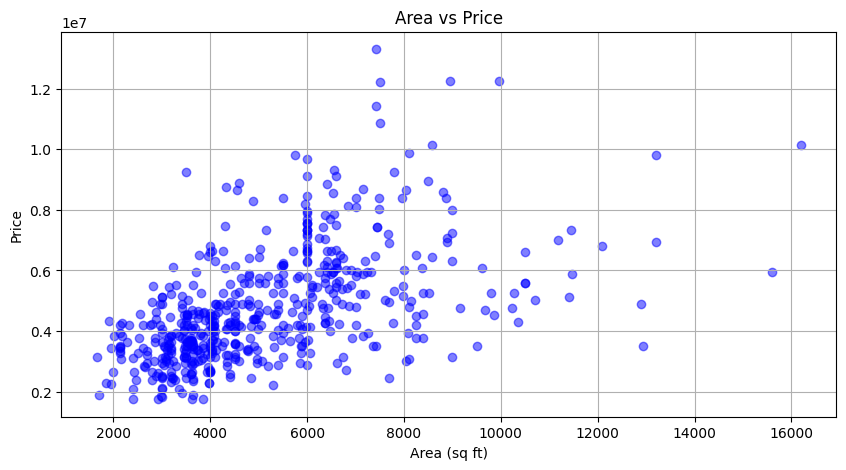

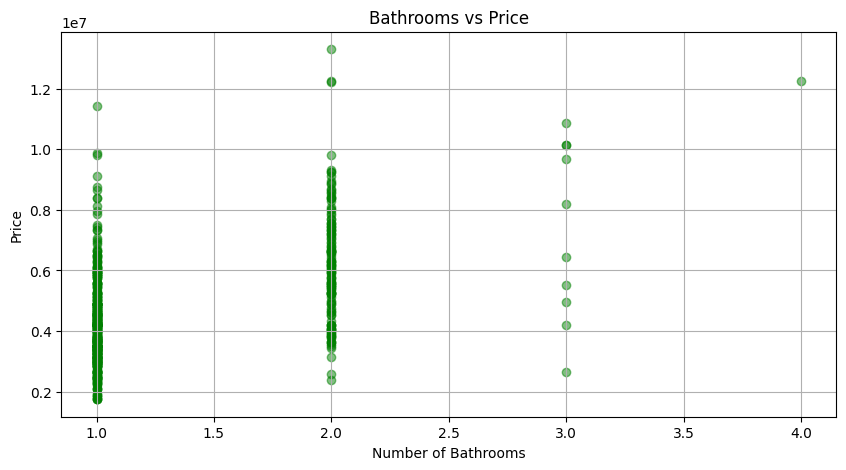

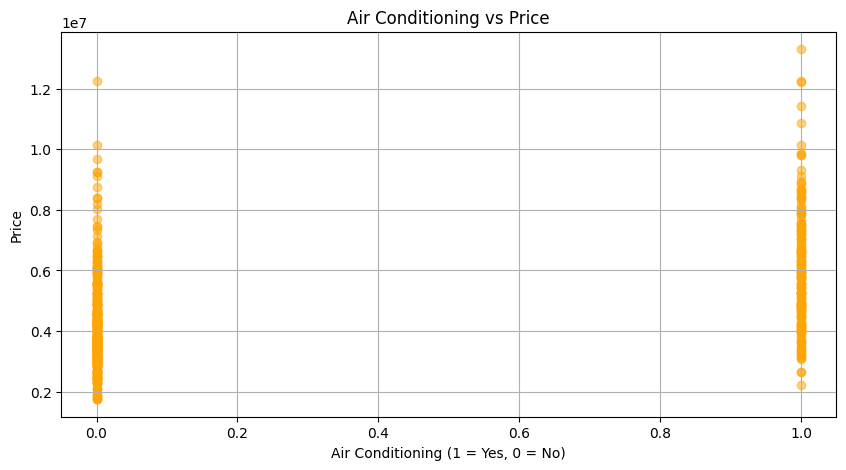

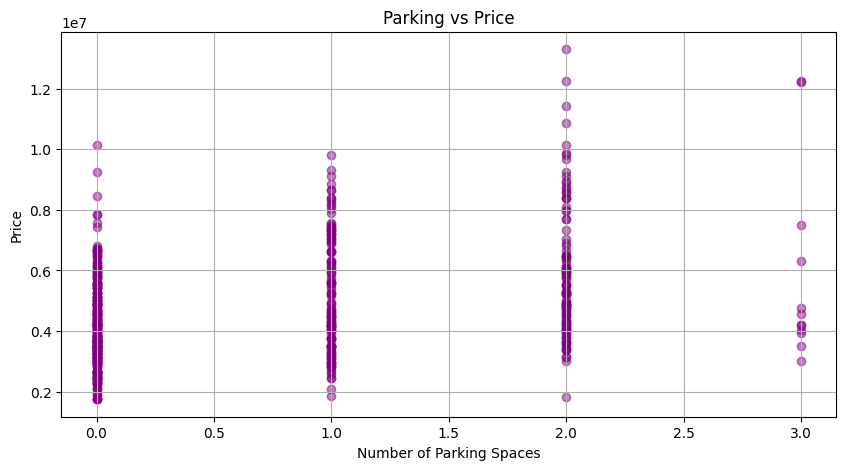

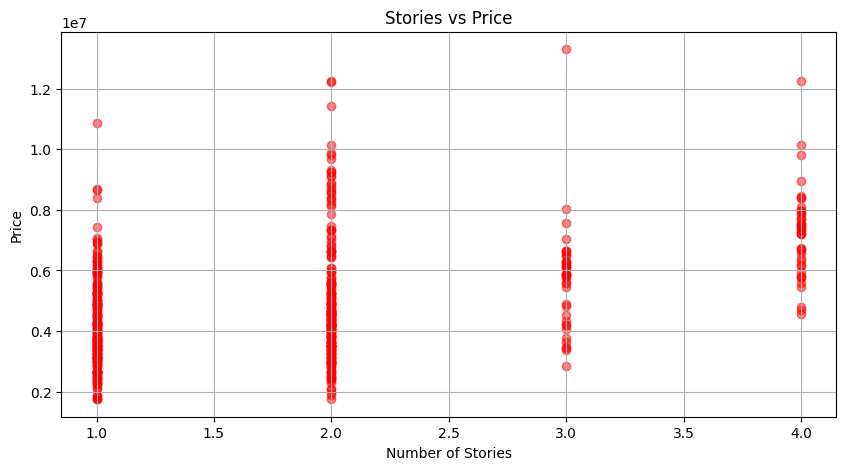

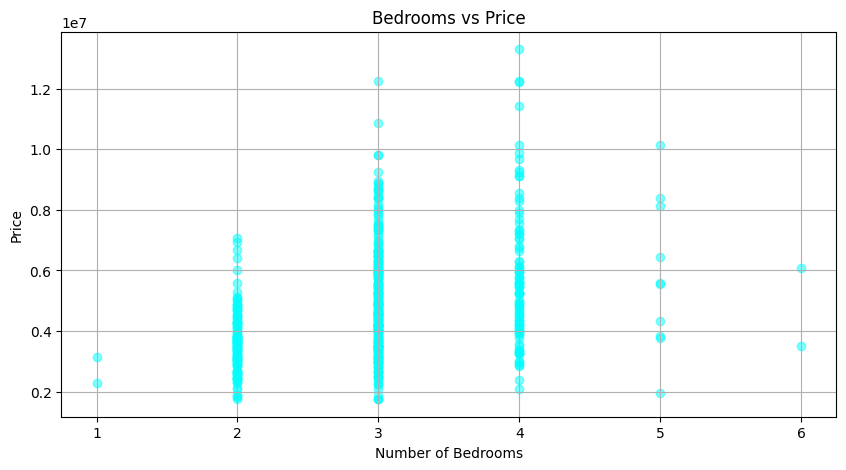

In [21]:
import matplotlib.pyplot as plt

# สร้างกราฟสำหรับฟีเจอร์ area
plt.figure(figsize=(10, 5))
plt.scatter(df['area'], df['price'], color='blue', alpha=0.5)
plt.title('Area vs Price')
plt.xlabel('Area (sq ft)')
plt.ylabel('Price')
plt.grid()
plt.show()

# สร้างกราฟสำหรับฟีเจอร์ bathrooms
plt.figure(figsize=(10, 5))
plt.scatter(df['bathrooms'], df['price'], color='green', alpha=0.5)
plt.title('Bathrooms vs Price')
plt.xlabel('Number of Bathrooms')
plt.ylabel('Price')
plt.grid()
plt.show()

# สร้างกราฟสำหรับฟีเจอร์ airconditioning
plt.figure(figsize=(10, 5))
plt.scatter(df['airconditioning'], df['price'], color='orange', alpha=0.5)
plt.title('Air Conditioning vs Price')
plt.xlabel('Air Conditioning (1 = Yes, 0 = No)')
plt.ylabel('Price')
plt.grid()
plt.show()

# สร้างกราฟสำหรับฟีเจอร์ parking
plt.figure(figsize=(10, 5))
plt.scatter(df['parking'], df['price'], color='purple', alpha=0.5)
plt.title('Parking vs Price')
plt.xlabel('Number of Parking Spaces')
plt.ylabel('Price')
plt.grid()
plt.show()

# สร้างกราฟสำหรับฟีเจอร์ stories
plt.figure(figsize=(10, 5))
plt.scatter(df['stories'], df['price'], color='red', alpha=0.5)
plt.title('Stories vs Price')
plt.xlabel('Number of Stories')
plt.ylabel('Price')
plt.grid()
plt.show()

# สร้างกราฟสำหรับฟีเจอร์ bedrooms
plt.figure(figsize=(10, 5))
plt.scatter(df['bedrooms'], df['price'], color='cyan', alpha=0.5)
plt.title('Bedrooms vs Price')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price')
plt.grid()
plt.show()

In [22]:
from sklearn.model_selection import GridSearchCV

# กำหนดพารามิเตอร์ที่ต้องการทดสอบสำหรับ Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# สร้างโมเดล Random Forest
rf_model = RandomForestRegressor(random_state=42)

# ใช้ GridSearchCV เพื่อค้นหาค่าพารามิเตอร์ที่ดีที่สุด
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_new, y_train_new)

# แสดงค่าพารามิเตอร์ที่ดีที่สุด
print("Best parameters for Random Forest after tuning:", grid_search.best_params_)
# สร้างโมเดล Random Forest ใหม่โดยใช้พารามิเตอร์ที่ดีที่สุด
best_rf_model = RandomForestRegressor(
    n_estimators=grid_search.best_params_['n_estimators'],
    max_depth=grid_search.best_params_['max_depth'],
    min_samples_split=grid_search.best_params_['min_samples_split'],
    random_state=42
)

# ฝึกโมเดล
best_rf_model.fit(X_train_new, y_train_new)

# ทำนายผล
best_rf_predictions = best_rf_model.predict(X_test_new)

# ประเมินผล
best_rf_mse = mean_squared_error(y_test_new, best_rf_predictions)
best_rf_r2 = r2_score(y_test_new, best_rf_predictions)

print("Best Random Forest MSE:", best_rf_mse)
print("Best Random Forest R^2:", best_rf_r2)

Best parameters for Random Forest after tuning: {'max_depth': None, 'min_samples_split': 10, 'n_estimators': 50}
Best Random Forest MSE: 2290681357676.0073
Best Random Forest R^2: 0.5468098678961402


In [23]:
from sklearn.model_selection import GridSearchCV

# กำหนดพารามิเตอร์ที่ต้องการทดสอบสำหรับ Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# สร้างโมเดล Random Forest
rf_model = RandomForestRegressor(random_state=42)

# ใช้ GridSearchCV เพื่อค้นหาค่าพารามิเตอร์ที่ดีที่สุด
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_new, y_train_new)

# แสดงค่าพารามิเตอร์ที่ดีที่สุด
print("Best parameters for Random Forest after tuning:", grid_search.best_params_)

Best parameters for Random Forest after tuning: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 50}


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
540 fits failed out of a total of 1620.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
540 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/uti

In [24]:
from sklearn.model_selection import GridSearchCV

# กำหนดพารามิเตอร์ที่ต้องการทดสอบสำหรับ Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']  # แก้ไขให้ไม่มี 'auto'
}

# สร้างโมเดล Random Forest
rf_model = RandomForestRegressor(random_state=42)

# ใช้ GridSearchCV เพื่อค้นหาค่าพารามิเตอร์ที่ดีที่สุด
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train_new, y_train_new)

# แสดงค่าพารามิเตอร์ที่ดีที่สุด
print("Best parameters for Random Forest after tuning:", grid_search.best_params_)

Best parameters for Random Forest after tuning: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 50}


In [25]:
# สร้างโมเดล Random Forest ใหม่โดยใช้พารามิเตอร์ที่ดีที่สุด
best_rf_model = RandomForestRegressor(
    n_estimators=grid_search.best_params_['n_estimators'],
    max_depth=grid_search.best_params_['max_depth'],
    min_samples_split=grid_search.best_params_['min_samples_split'],
    min_samples_leaf=grid_search.best_params_['min_samples_leaf'],
    max_features=grid_search.best_params_['max_features'],
    random_state=42
)

# ฝึกโมเดล
best_rf_model.fit(X_train_new, y_train_new)

# ทำนายผล
best_rf_predictions = best_rf_model.predict(X_test_new)

# ประเมินผล
best_rf_mse = mean_squared_error(y_test_new, best_rf_predictions)
best_rf_r2 = r2_score(y_test_new, best_rf_predictions)

print("Best Random Forest MSE:", best_rf_mse)
print("Best Random Forest R^2:", best_rf_r2)

Best Random Forest MSE: 2186521998657.2864
Best Random Forest R^2: 0.5674168342537124


In [26]:
from sklearn.model_selection import GridSearchCV

# กำหนดพารามิเตอร์ที่ต้องการทดสอบสำหรับ Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']  # แก้ไขให้ไม่มี 'auto'
}

# สร้างโมเดล Random Forest
rf_model = RandomForestRegressor(random_state=42)

# ใช้ GridSearchCV เพื่อค้นหาค่าพารามิเตอร์ที่ดีที่สุด
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train_new, y_train_new)

# แสดงค่าพารามิเตอร์ที่ดีที่สุด
print("Best parameters for Random Forest after tuning:", grid_search.best_params_)

Best parameters for Random Forest after tuning: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 50}


In [27]:
# สร้างโมเดล Random Forest ใหม่โดยใช้พารามิเตอร์ที่ดีที่สุด
best_rf_model = RandomForestRegressor(
    n_estimators=50,
    max_depth=10,
    min_samples_split=2,
    min_samples_leaf=4,
    max_features='sqrt',
    random_state=42
)

# ฝึกโมเดล
best_rf_model.fit(X_train_new, y_train_new)

# ทำนายผล
best_rf_predictions = best_rf_model.predict(X_test_new)

# ประเมินผล
best_rf_mse = mean_squared_error(y_test_new, best_rf_predictions)
best_rf_r2 = r2_score(y_test_new, best_rf_predictions)

print("Best Random Forest MSE:", best_rf_mse)
print("Best Random Forest R^2:", best_rf_r2)

Best Random Forest MSE: 2186521998657.2864
Best Random Forest R^2: 0.5674168342537124


In [28]:
import pandas as pd

# อ่านข้อมูลจากไฟล์ Housing.csv
housing_data = pd.read_csv('Housing.csv')

# แสดงข้อมูลบางส่วนจาก DataFrame
print(housing_data.head())

      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  


In [29]:
from sklearn.model_selection import GridSearchCV

# กำหนดพารามิเตอร์ที่ต้องการทดสอบ
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}

# สร้างโมเดล Random Forest
rf = RandomForestRegressor(random_state=42)

# ใช้ GridSearchCV เพื่อค้นหาพารามิเตอร์ที่ดีที่สุด
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_new, y_train_new)

# แสดงพารามิเตอร์ที่ดีที่สุด
print("Best parameters:", grid_search.best_params_)

Best parameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 50}


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
270 fits failed out of a total of 540.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
270 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/util

           Feature  Importance
0             area    0.556758
1        bathrooms    0.158357
3          parking    0.077696
4          stories    0.072915
2  airconditioning    0.070891
5         bedrooms    0.063383
Series([], dtype: int64)


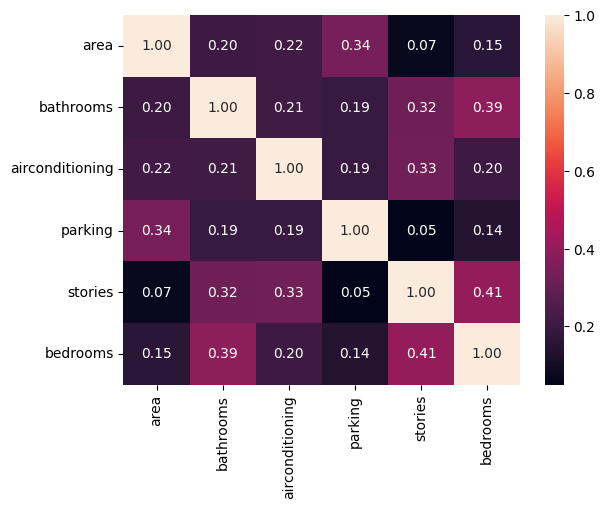

Cross-Validation MSE: 1506954337095.7087


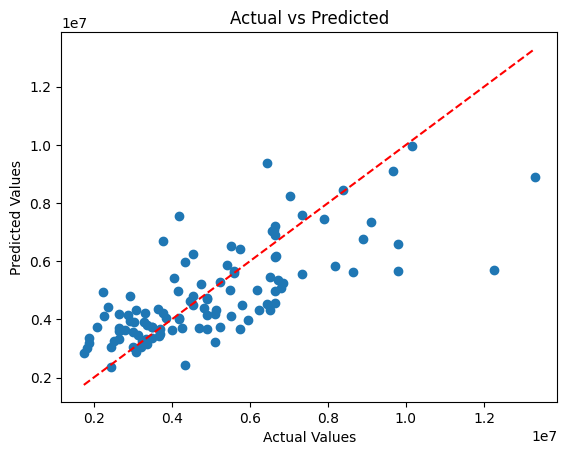

In [30]:
from sklearn.ensemble import RandomForestRegressor
import pandas as pd

# สร้างโมเดล Random Forest
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train_new, y_train_new)

# แสดงความสำคัญของฟีเจอร์
importances = rf.feature_importances_
feature_names = X_train_new.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
print(feature_importance_df.sort_values(by='Importance', ascending=False))
# ตรวจสอบข้อมูลที่ขาดหาย
missing_values = X_train_new.isnull().sum()
print(missing_values[missing_values > 0])

# เติมค่าที่ขาดหายด้วยค่าเฉลี่ย
X_train_new.fillna(X_train_new.mean(), inplace=True)
X_test_new.fillna(X_test_new.mean(), inplace=True)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_new)
X_test_scaled = scaler.transform(X_test_new)
from sklearn.ensemble import GradientBoostingRegressor

# สร้างโมเดล Gradient Boosting
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train_new, y_train_new)

# ทำนายผล
gb_predictions = gb_model.predict(X_test_new)
# ตัวอย่างการเพิ่มข้อมูล (อาจจะต้องปรับให้เหมาะสมกับข้อมูลของคุณ)
import numpy as np

# สุ่มเพิ่มข้อมูล
X_train_augmented = np.vstack([X_train_new, X_train_new + np.random.normal(0, 0.1, X_train_new.shape)])
y_train_augmented = np.hstack([y_train_new, y_train_new])
from xgboost import XGBRegressor

# สร้างโมเดล XGBoost
xgb_model = XGBRegressor(random_state=42)
xgb_model.fit(X_train_new, y_train_new)

# ทำนายผล
xgb_predictions = xgb_model.predict(X_test_new)
import seaborn as sns
import matplotlib.pyplot as plt

# สร้างกราฟความสัมพันธ์
sns.heatmap(X_train_new.corr(), annot=True, fmt=".2f")
plt.show()
from sklearn.model_selection import cross_val_score

# ใช้ Cross-Validation
cv_scores = cross_val_score(rf, X_train_new, y_train_new, cv=5, scoring='neg_mean_squared_error')
print("Cross-Validation MSE:", -cv_scores.mean())
import matplotlib.pyplot as plt

# ทำนายผล
rf_predictions = rf.predict(X_test_new)

# แสดงกราฟข้อผิดพลาด
plt.scatter(y_test_new, rf_predictions)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted")
plt.plot([ y_test_new.min(), y_test_new.max()], [y_test_new.min(), y_test_new.max()], color='red', linestyle='--')
plt.show()

In [31]:
import pandas as pd

# สร้างฟีเจอร์ใหม่: อัตราส่วนระหว่างจำนวนห้องนอนและห้องน้ำ
X_train_new['bed_bath_ratio'] = X_train_new['bedrooms'] / (X_train_new['bathrooms'] + 1e-5)  # ป้องกันการหารด้วย 0
X_test_new['bed_bath_ratio'] = X_test_new['bedrooms'] / (X_test_new['bathrooms'] + 1e-5)

# สร้างฟีเจอร์ใหม่: รวมฟีเจอร์ที่เกี่ยวข้อง
X_train_new['total_rooms'] = X_train_new['bedrooms'] + X_train_new['bathrooms']
X_test_new['total_rooms'] = X_test_new['bedrooms'] + X_test_new['bathrooms']

In [32]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

# สร้างโมเดล XGBoost
xgb_model = XGBRegressor(random_state=42)
xgb_model.fit(X_train_new, y_train_new)

# ทำนายผล
xgb_predictions = xgb_model.predict(X_test_new)

# ประเมินผล
xgb_mse = mean_squared_error(y_test_new, xgb_predictions)
xgb_r2 = r2_score(y_test_new, xgb_predictions)

print("XGBoost MSE:", xgb_mse)
print("XGBoost R^2:", xgb_r2)

XGBoost MSE: 2261580513280.0
XGBoost R^2: 0.5525672435760498


In [33]:
from sklearn.model_selection import RandomizedSearchCV

# กำหนดพารามิเตอร์ที่ต้องการทดสอบ
param_dist = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}

# สร้างโมเดล Random Forest
rf = RandomForestRegressor(random_state=42)

# ใช้ RandomizedSearchCV เพื่อค้นหาพารามิเตอร์ที่ดีที่สุด
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist, n_iter=100, cv=5, scoring='neg_mean_squared_error', random_state=42)
random_search.fit(X_train_new, y_train_new)

# แสดงพารามิเตอร์ที่ดีที่สุด
print("Best parameters from RandomizedSearchCV:", random_search.best_params_)

Best parameters from RandomizedSearchCV: {'n_estimators': 50, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 30}


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
255 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
255 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/util

In [34]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

# กำหนดพารามิเตอร์ที่ต้องการทดสอบ
param_dist = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']  # แก้ไขที่นี่
}

# สร้างโมเดล Random Forest
rf = RandomForestRegressor(random_state=42)

# ใช้ RandomizedSearchCV เพื่อค้นหาพารามิเตอร์ที่ดีที่สุด
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist, n_iter=100, cv=5, scoring='neg_mean_squared_error', random_state=42)
random_search.fit(X_train_new, y_train_new)

# แสดงพารามิเตอร์ที่ดีที่สุด
print("Best parameters from RandomizedSearchCV:", random_search.best_params_)

Best parameters from RandomizedSearchCV: {'n_estimators': 50, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 20}


In [35]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# สร้างโมเดล Random Forest ใหม่โดยใช้พารามิเตอร์ที่ดีที่สุด
best_rf_model = RandomForestRegressor(
    n_estimators=50,
    max_depth=20,
    min_samples_split=5,
    min_samples_leaf=2,
    max_features='sqrt',
    random_state=42
)

# ฝึกโมเดล
best_rf_model.fit(X_train_new, y_train_new)

# ทำนายผล
best_rf_predictions = best_rf_model.predict(X_test_new)

# ประเมินผล
best_rf_mse = mean_squared_error(y_test_new, best_rf_predictions)
best_rf_r2 = r2_score(y_test_new, best_rf_predictions)

print("Best Random Forest MSE:", best_rf_mse)
print("Best Random Forest R^2:", best_rf_r2)

Best Random Forest MSE: 2178268845680.187
Best Random Forest R^2: 0.569049644280053


In [36]:
# นำเข้าไลบรารีที่จำเป็น
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import pickle

# 1. โหลดข้อมูล
df = pd.read_csv('Housing.csv')  # แทนที่ด้วยเส้นทางของไฟล์ข้อมูลของคุณ

# 2. ตรวจสอบข้อมูลเบื้องต้น
print(df.head())
print(df.info())

# 3. จัดการค่าที่ขาดหายไป (ถ้ามี)
# แยกคอลัมน์ที่เป็นตัวเลขและตัวอักษร
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

# เติมค่าที่ขาดหายไปในคอลัมน์ตัวเลขด้วยค่าเฉลี่ย
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

# เติมค่าที่ขาดหายไปในคอลัมน์ตัวอักษรด้วยค่าที่พบบ่อยที่สุด
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])  # Assign back to the DataFrame


# 4. แบ่งข้อมูลเป็นฟีเจอร์และเป้าหมาย
X = df.drop('price', axis=1)  # แทนที่ 'price' ด้วยชื่อคอลัมน์เป้าหมาย
y = df['price']

# 5. แปลงคอลัมน์ตัวอักษรเป็นตัวเลข (One-Hot Encoding)
X = pd.get_dummies(X, drop_first=True)

# 6. แบ่งข้อมูลเป็นชุดฝึกและชุดทดสอบ
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 7. สร้างโมเดล Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# 8. ฝึกโมเดล
rf_model.fit(X_train, y_train)

# 9. ทำนายผล
y_pred = rf_model.predict(X_test)

# 10. ประเมินผล
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

# 11. บันทึกโมเดลเป็นไฟล์ .pkl
with open('random_forest_model.pkl', 'wb') as file:
    pickle.dump(rf_model, file)

print("Model saved as random_forest_model.pkl")

      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 colu

In [37]:
import pandas as pd
import pickle
from sklearn.metrics import mean_squared_error, r2_score

# โหลดโมเดล
with open('random_forest_model.pkl', 'rb') as file:
    model = pickle.load(file)

# เตรียมข้อมูลทดสอบ (ตัวอย่างข้อมูล)
data = {
    'area': [7420, 8960, 9960, 7500, 7420],
    'bedrooms': [4, 4, 3, 4, 4],
    'bathrooms': [2, 4, 2, 2, 1],
    'stories': [3, 4, 2, 2, 2],
    'mainroad': ['yes', 'yes', 'yes', 'yes', 'yes'],
    'guestroom': ['no', 'no', 'no', 'no', 'yes'],
    'basement': ['no', 'no', 'yes', 'yes', 'yes'],
    'hotwaterheating': ['no', 'no', 'no', 'no', 'no'],
    'airconditioning': ['yes', 'yes', 'no', 'yes', 'yes'],
    'parking': [2, 3, 2, 3, 2],
    'prefarea': ['yes', 'no', 'yes', 'yes', 'no'],
    'furnishingstatus': ['furnished', 'furnished', 'semi-furnished', 'furnished', 'furnished']
}

# สร้าง DataFrame
test_df = pd.DataFrame(data)

# แปลงฟีเจอร์เชิงหมวดหมู่เป็นตัวเลข (One-Hot Encoding)
test_df = pd.get_dummies(test_df, drop_first=True)

# ตรวจสอบฟีเจอร์ที่โมเดลต้องการ
model_features = model.feature_names_in_

# เพิ่มฟีเจอร์ที่ขาดหายไปใน test_df
for feature in model_features:
    if feature not in test_df.columns:
        test_df[feature] = 0  # เพิ่มฟีเจอร์ที่ขาดหายไปด้วยค่า 0

# จัดเรียงฟีเจอร์ใน test_df ให้ตรงกับโมเดล
test_df = test_df[model_features]

# ทำการทำนาย
predictions = model.predict(test_df)

# แสดงผลลัพธ์
print("Predictions:", predictions)

Predictions: [ 8500888.2 11351200.   6511505.  10618469.4  9611700. ]


In [38]:
# สมมติว่าคุณมีค่าจริงสำหรับการประเมินผล
true_values = [8500000, 11500000, 6500000, 11000000, 9500000]  # แทนที่ด้วยค่าจริงที่คุณมี

# คำนวณ MSE และ R² Score
mse = mean_squared_error(true_values, predictions)
r2 = r2_score(true_values, predictions)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 36063416532.11994
R^2 Score: 0.9888693158851481


In [39]:
from sklearn.preprocessing import MinMaxScaler

# สร้าง scaler
scaler = MinMaxScaler()

# ปรับขนาดฟีเจอร์พื้นที่
df['area'] = scaler.fit_transform(df[['area']])

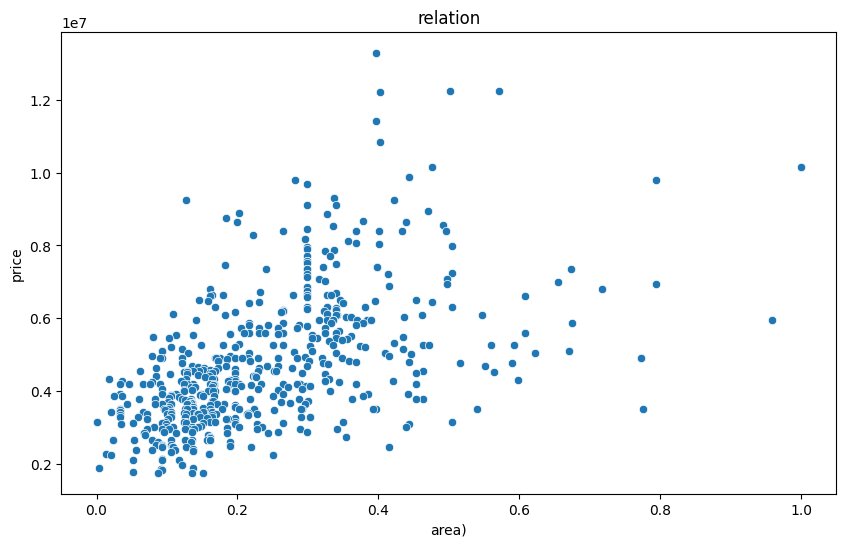

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

# สร้าง scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='area', y='price')
plt.title('relation')
plt.xlabel('area)')
plt.ylabel('price')
plt.show()

In [41]:
from sklearn.ensemble import RandomForestRegressor

# สร้างโมเดล
model = RandomForestRegressor(n_estimators=100, random_state=42)

# ฝึกโมเดล
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [42]:
df['area'] = df['area'].fillna(df['area'].mean())

In [43]:
# โหลดโมเดลจากไฟล์ pkl
with open('random_forest_model.pkl', 'rb') as model_file:
    loaded_model = pickle.load(model_file)

In [44]:
# บันทึกโมเดลลงในไฟล์ pkl
with open('random_forest_model.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)

In [45]:
import pandas as pd
import pickle

# โหลดโมเดล Random Forest
with open('random_forest_model.pkl', 'rb') as file:
    model = pickle.load(file)

# เตรียมข้อมูลสำหรับการทำนาย โดยใช้เพียงฟีเจอร์ "Area"
data = {
    'area': [3000]  # พื้นที่ที่ต้องการทำนายราคา
}

# สร้าง DataFrame จากข้อมูล
input_data = pd.DataFrame(data)

# ตรวจสอบให้แน่ใจว่าโมเดลสามารถทำงานได้กับข้อมูลนี้
# เนื่องจากโมเดลอาจต้องการฟีเจอร์อื่น ๆ ที่ไม่ได้ใช้
# เราจะต้องจัดการกับฟีเจอร์ที่โมเดลคาดหวัง
model_features = model.feature_names_in_

# สร้าง DataFrame ที่มีฟีเจอร์ที่โมเดลต้องการ
# เพิ่มฟีเจอร์ที่ขาดหายไปด้วยค่า 0
for feature in model_features:
    if feature not in input_data.columns:
        input_data[feature] = 0  # เพิ่มฟีเจอร์ที่ขาดหายไปด้วยค่า 0

# จัดเรียงฟีเจอร์ใน input_data ให้ตรงกับโมเดล
input_data = input_data[model_features]

# ทำนายราคาบ้าน
predicted_price = model.predict(input_data)

# แสดงผลลัพธ์
print(f"Predicted Price: {predicted_price[0]} Baht")

Predicted Price: 2850680.0 Baht


In [46]:
from sklearn.model_selection import train_test_split

X = df[['area']]  # ฟีเจอร์พื้นที่
y = df['price']   # ราคาบ้าน
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [47]:
from sklearn.ensemble import RandomForestRegressor

# สร้างโมเดล Random Forest
model = RandomForestRegressor(n_estimators=100, random_state=42)

# ฝึกโมเดล
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [48]:
# ทำนายราคาบ้านจากชุดทดสอบ
y_pred = model.predict(X_test)

# แสดงผลลัพธ์
for area, price in zip(X_test['area'], y_pred):
    print(f"พื้นที่: {area} ตารางเมตร, ราคาที่คาดการณ์: {price:.2f} บาท")

พื้นที่: 0.29209621993127144 ตารางเมตร, ราคาที่คาดการณ์: 3536505.00 บาท
พื้นที่: 0.3333333333333333 ตารางเมตร, ราคาที่คาดการณ์: 5930341.67 บาท
พื้นที่: 0.1642611683848797 ตารางเมตร, ราคาที่คาดการณ์: 4219608.11 บาท
พื้นที่: 0.23024054982817865 ตารางเมตร, ราคาที่คาดการณ์: 5528506.67 บาท
พื้นที่: 0.15876288659793814 ตารางเมตร, ราคาที่คาดการณ์: 5123871.67 บาท
พื้นที่: 0.34845360824742266 ตารางเมตร, ราคาที่คาดการณ์: 5587470.00 บาท
พื้นที่: 0.4721649484536082 ตารางเมตร, ราคาที่คาดการณ์: 7558092.50 บาท
พื้นที่: 0.22955326460481096 ตารางเมตร, ราคาที่คาดการณ์: 4398753.33 บาท
พื้นที่: 0.10927835051546392 ตารางเมตร, ราคาที่คาดการณ์: 4745965.00 บาท
พื้นที่: 0.07216494845360824 ตารางเมตร, ราคาที่คาดการณ์: 3199700.00 บาท
พื้นที่: 0.47628865979381435 ตารางเมตร, ราคาที่คาดการณ์: 7769930.00 บาท
พื้นที่: 0.15697594501718215 ตารางเมตร, ราคาที่คาดการณ์: 3821329.17 บาท
พื้นที่: 0.1422680412371134 ตารางเมตร, ราคาที่คาดการณ์: 4264610.00 บาท
พื้นที่: 0.09965635738831616 ตารางเมตร, ราคาที่คาดการณ์: 3154637.50 

In [49]:
import pickle

with open('random_forest_model.pkl', 'wb') as file:
    pickle.dump(model, file)

In [50]:
from sklearn.model_selection import train_test_split

X = df[['area']]  # ฟีเจอร์พื้นที่
y = df['price']   # ราคาบ้าน
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [51]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import pickle

# 1. โหลดข้อมูลจากไฟล์ CSV
df = pd.read_csv('Housing.csv')  # เปลี่ยนเป็นที่อยู่ของไฟล์ Housing.csv ของคุณ

# 2. สำรวจข้อมูล
print(df.head())
print(df.info())

# 3. เตรียมข้อมูล
# สมมติว่า DataFrame มีฟีเจอร์ 'area' และ 'price'
# ตรวจสอบว่าฟีเจอร์ที่ต้องการมีอยู่ใน DataFrame
if 'area' not in df.columns or 'price' not in df.columns:
    raise ValueError("DataFrame ต้องมีฟีเจอร์ 'area' และ 'price'")

# จัดการกับค่าที่ขาดหายไป
df.dropna(subset=['area', 'price'], inplace=True)

# 4. แบ่งข้อมูลเป็นชุดฝึกอบรมและชุดทดสอบ
X = df[['area']]  # ฟีเจอร์พื้นที่
y = df['price']   # ราคาบ้าน
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. สร้างโมเดล Random Forest
model = RandomForestRegressor(n_estimators=100, random_state=42)

# ฝึกโมเดล
model.fit(X_train, y_train)

# 6. บันทึกโมเดลลงในไฟล์ pkl
with open('random_forest_model.pkl', 'wb') as file:
    pickle.dump(model, file)

print("โมเดลถูกบันทึกเรียบร้อยแล้วในไฟล์ random_forest_model.pkl")

      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 colu

In [52]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import pickle

# โหลดข้อมูลจากไฟล์ CSV
df = pd.read_csv('Housing.csv')  # เปลี่ยนเป็นที่อยู่ของไฟล์ Housing.csv ของคุณ

# เตรียมข้อมูล
X = df.drop('price', axis=1)  # ฟีเจอร์ทั้งหมด ยกเว้นราคา
y = df['price']  # ราคาบ้าน

# แบ่งข้อมูลเป็นชุดฝึกอบรมและชุดทดสอบ
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# สร้าง Pipeline สำหรับการแปลงข้อมูลและการฝึกโมเดล
numeric_features = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
categorical_features = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']

# สร้าง ColumnTransformer เพื่อจัดการกับฟีเจอร์เชิงตัวเลขและเชิงหมวดหมู่
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# สร้าง Pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

# ฝึกโมเดล
model.fit(X_train, y_train)

# บันทึกโมเดลลงในไฟล์ pkl
with open('random_forest_model.pkl', 'wb') as file:
    pickle.dump(model, file)

print("โมเดลถูกบันทึกเรียบร้อยแล้วในไฟล์ random_forest_model.pkl")

โมเดลถูกบันทึกเรียบร้อยแล้วในไฟล์ random_forest_model.pkl


In [53]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
import pickle
from google.colab import files

# อ่านข้อมูลจากไฟล์ CSV
df = pd.read_csv('Housing.csv')  # เปลี่ยนชื่อไฟล์หากจำเป็น

# สำรวจข้อมูล
print(df.head())
print(df.info())

# เตรียมข้อมูล
# สมมติว่า DataFrame มีฟีเจอร์ 'area' และ 'price'
if 'area' not in df.columns or 'price' not in df.columns:
    raise ValueError("DataFrame ต้องมีฟีเจอร์ 'area' และ 'price'")

# แบ่งข้อมูลเป็นชุดฝึกอบรมและชุดทดสอบ
X = df[['area']]  # ฟีเจอร์พื้นที่
y = df['price']   # ราคาบ้าน
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# สร้างโมเดล Random Forest
model = RandomForestRegressor(n_estimators=100, random_state=42)

# ฝึกโมเดล
model.fit(X_train, y_train)

# ทำนายราคาบ้าน
predicted_prices = model.predict(X_test)

# คำนวณค่าความผิดพลาด
mae = mean_absolute_error(y_test, predicted_prices)
mape = mean_absolute_percentage_error(y_test, predicted_prices)

print(f'Mean Absolute Error (MAE): {mae:.2f} บาท')
print(f'Mean Absolute Percentage Error (MAPE): {mape:.2%}')

# บันทึกโมเดลลงในไฟล์ pkl
with open('random_forest_model.pkl', 'wb') as file:
    pickle.dump(model, file)

print("โมเดลถูกบันทึกเรียบร้อยแล้วในไฟล์ random_forest_model.pkl")

      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 colu

In [54]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
import pickle
from google.colab import files

# อ่านข้อมูลจากไฟล์ CSV
df = pd.read_csv('Housing.csv')

# แปลงพื้นที่จากตารางฟุตเป็นตารางเมตร
df['area'] = df['area'] * 0.092903

# สำรวจข้อมูล
print(df.head())
print(df.info())

# เตรียมข้อมูล
X = df.drop('price', axis=1)  # ฟีเจอร์ทั้งหมด ยกเว้นราคา
y = df['price']  # ราคาบ้าน

# แปลงฟีเจอร์เชิงหมวดหมู่เป็นตัวเลข
X = pd.get_dummies(X, drop_first=True)

# แบ่งข้อมูลเป็นชุดฝึกอบรมและชุดทดสอบ
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# สร้างโมเดล Random Forest
model = RandomForestRegressor(n_estimators=100, random_state=42)

# ฝึกโมเดล
model.fit(X_train, y_train)

# ทำนายราคาบ้าน
predicted_prices = model.predict(X_test)

# คำนวณค่าความผิดพลาด
mae = mean_absolute_error(y_test, predicted_prices)
mape = mean_absolute_percentage_error(y_test, predicted_prices)

print(f'Mean Absolute Error (MAE): {mae:.2f} บาท')
print(f'Mean Absolute Percentage Error (MAPE): {mape:.2%}')

# บันทึกโมเดลลงในไฟล์ pkl
with open('random_forest_model.pkl', 'wb') as file:
    pickle.dump(model, file)

print("โมเดลถูกบันทึกเรียบร้อยแล้วในไฟล์ random_forest_model.pkl")

      price       area  bedrooms  bathrooms  stories mainroad guestroom  \
0  13300000  689.34026         4          2        3      yes        no   
1  12250000  832.41088         4          4        4      yes        no   
2  12250000  925.31388         3          2        2      yes        no   
3  12215000  696.77250         4          2        2      yes        no   
4  11410000  689.34026         4          1        2      yes       yes   

  basement hotwaterheating airconditioning  parking prefarea furnishingstatus  
0       no              no             yes        2      yes        furnished  
1       no              no             yes        3       no        furnished  
2      yes              no              no        2      yes   semi-furnished  
3      yes              no             yes        3      yes        furnished  
4      yes              no             yes        2       no        furnished  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 5

In [55]:
from sklearn.model_selection import GridSearchCV

# กำหนดพารามิเตอร์ที่ต้องการทดสอบ
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# สร้าง Grid Search
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='neg_mean_absolute_error')

# ฝึก Grid Search
grid_search.fit(X_train, y_train)

# แสดงผลลัพธ์
print(f'Best parameters: {grid_search.best_params_}')
print(f'Best MAE: {-grid_search.best_score_:.2f}')

Best parameters: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 200}
Best MAE: 764213.33


Mean Absolute Error (MAE): 1020847.32 บาท
Mean Absolute Percentage Error (MAPE): 21.79%


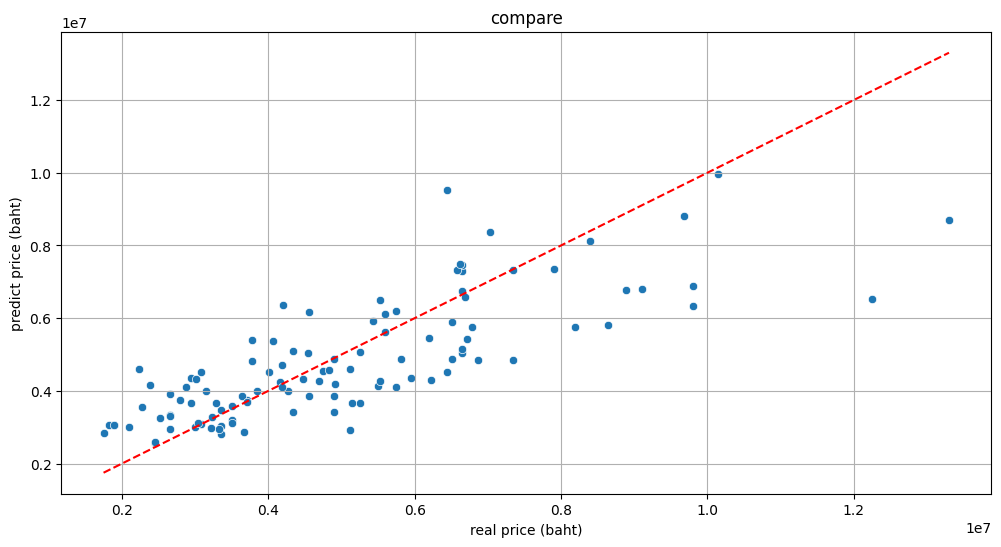

โมเดลถูกบันทึกเรียบร้อยแล้วในไฟล์ random_forest_model.pkl


In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
import pickle
from google.colab import files

# อ่านข้อมูลจากไฟล์ CSV
df = pd.read_csv('Housing.csv')

# แปลงพื้นที่จากตารางฟุตเป็นตารางเมตร
df['area'] = df['area'] * 0.092903

# เตรียมข้อมูล
X = df.drop('price', axis=1)  # ฟีเจอร์ทั้งหมด ยกเว้นราคา
y = df['price']  # ราคาบ้าน

# แปลงฟีเจอร์เชิงหมวดหมู่เป็นตัวเลข
X = pd.get_dummies(X, drop_first=True)

# แบ่งข้อมูลเป็นชุดฝึกอบรมและชุดทดสอบ
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# สร้างโมเดล Random Forest
model = RandomForestRegressor(n_estimators=100, random_state=42)

# ฝึกโมเดล
model.fit(X_train, y_train)

# ทำนายราคาบ้าน
predicted_prices = model.predict(X_test)

# คำนวณค่าความผิดพลาด
mae = mean_absolute_error(y_test, predicted_prices)
mape = mean_absolute_percentage_error(y_test, predicted_prices)

print(f'Mean Absolute Error (MAE): {mae:.2f} บาท')
print(f'Mean Absolute Percentage Error (MAPE): {mape:.2%}')

# สร้างกราฟ
plt.figure(figsize=(12, 6))
sns.scatterplot(x=y_test, y=predicted_prices)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # เส้น 45 องศา
plt.xlabel('real price (baht)')
plt.ylabel('predict price (baht)')
plt.title('compare')
plt.grid()
plt.show()

# บันทึกโมเดลลงในไฟล์ pkl
with open('random_forest_model.pkl', 'wb') as file:
    pickle.dump(model, file)

print("โมเดลถูกบันทึกเรียบร้อยแล้วในไฟล์ random_forest_model.pkl")

In [57]:
# บันทึกโมเดลลงในไฟล์ pkl
with open('random_forest_model.pkl', 'wb') as file:
    pickle.dump(model, file)